In [1]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import scapy.all as sc

## Current Iteration

In [2]:
def pkts_to_grouped_df(pkts):
    times = [p.time for p in pkts]
    data = [p.len for p in pkts]
    datetimes = [datetime.datetime.fromtimestamp(c) for c in times]
    d = {'timestamp': datetimes, 'pkt_sizes': data}
    df = pd.DataFrame(data=d)
    grouped = df.groupby('timestamp')['pkt_sizes'].sum() / 1000 * 8
    grouped = grouped.to_frame()
    grouped['timestamp'] = grouped.index
    # Start time at "zero"
    print("grouped['timestamp'][0]", grouped['timestamp'][0])
    grouped['time_elapsed'] = grouped['timestamp'] - grouped['timestamp'][0]
    minutes_elapsed = [t.total_seconds() /60 for t in grouped.time_elapsed]
    grouped['minutes_elapsed'] = minutes_elapsed
    
    return grouped

grouped['timestamp'][0] 2020-12-05 12:25:59


Text(0, 0.5, 'Video Flow Throughput (kbps)')

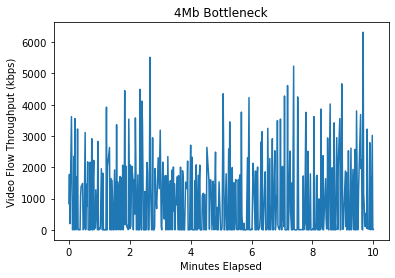

In [6]:
online_to_4 = sc.rdpcap('data/sniff_4.cap')
online_to_4_df = pkts_to_grouped_df(online_to_4)

plt.plot(online_to_4_df['minutes_elapsed'], online_to_4_df['pkt_sizes'])
plt.title('4Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

grouped['timestamp'][0] 2020-12-05 12:37:29


Text(0, 0.5, 'Video Flow Throughput (kbps)')

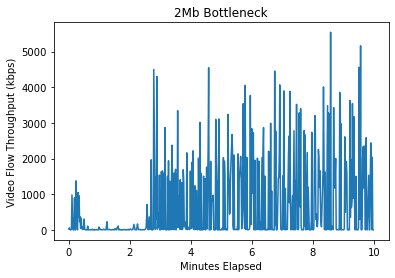

In [7]:
online_to_2 = sc.rdpcap('data/sniff_2.cap')
online_to_2_df = pkts_to_grouped_df(online_to_2)

plt.plot(online_to_2_df['minutes_elapsed'], online_to_2_df['pkt_sizes'])
plt.title('2Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

grouped['timestamp'][0] 2020-12-05 12:48:39


Text(0, 0.5, 'Video Flow Throughput (kbps)')

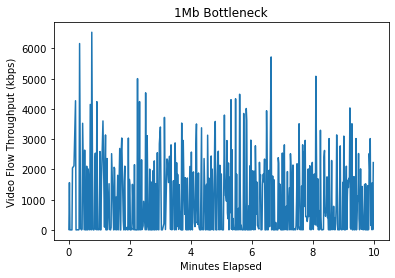

In [8]:
online_to_1 = sc.rdpcap('data/sniff_1.cap')
online_to_1_df = pkts_to_grouped_df(online_to_1)

plt.plot(online_to_1_df['minutes_elapsed'], online_to_1_df['pkt_sizes'])
plt.title('1Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

grouped['timestamp'][0] 2020-12-05 12:59:26


Text(0, 0.5, 'Video Flow Throughput (kbps)')

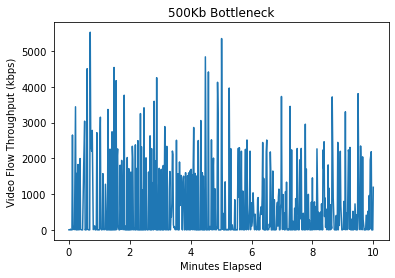

In [9]:
online_to_500 = sc.rdpcap('data/sniff_500.cap')
online_to_500_df = pkts_to_grouped_df(online_to_500)

plt.plot(online_to_500_df['minutes_elapsed'], online_to_500_df['pkt_sizes'])
plt.title('500Kb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

## Former Iterations

In [ ]:
with open('netflix_data_4mb.json', 'r') as f:
    ts = json.load(f)

In [ ]:
timestamps = []
packet_lengths = []
for t in ts:
    timestamps.append(t['ts'])
    packet_lengths.append(t['len'])
data = list(zip(timestamps, packet_lengths))
data = sorted(data, key=lambda x: x[0])

#reformatted_data = []
#first_ts = data[0][0]
#for (t, length) in data:
#    reformatted_data.append((t - first_ts, length))

#data = reformatted_data

accumulated_by_ts = {}
for (t, length) in data:
    if t not in accumulated_by_ts:
        accumulated_by_ts[t] = length
    else:
        accumulated_by_ts[t] += length

In [ ]:
timestamps = []
rates = []
items = list(accumulated_by_ts.items())
for i in range(1, len(items)):
    rate = ((items[i][0] - items[i-1][0])/1000) * 8
    # (items[i][0] - items[i-1][0])/(items[i-1][1]*1000*(1/8))
    #items[i-1][0]
    ts = i/60
    timestamps.append(ts)
    rates.append(rate)
plt.xlabel('Minutes Elapsed')
plt.ylabel("Video Flow Throughput")
plt.title("Flow Throughput for Netflix, throttle=4mb")
sns.lineplot(timestamps[5:], rates[5:])
